In [1]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB

from sklearn.pipeline import Pipeline
import os, re, string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

%matplotlib inline

from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn import decomposition, ensemble

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC

stop = [word.split() for word in open("C:\\Users\\Ruben\\Documents\\Artikelen\\Joris\\stopwords-nl.txt", 'r', encoding = "utf-8").readlines()]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
def clean_and_split_str(txt):
    #strip_special_chars = re.compile("[^A-Za-z0-9#]+")
    translator = str.maketrans('', '', string.punctuation)
    txt = txt.translate(translator)
    txt = re.sub('\s+', ' ', txt).strip()
    txt = txt.lower()
    
    #for word in ad_words:
    #    txt = txt.replace(word, "=MARKER=")
    
    return txt

In [11]:
os.chdir("C://Users//Ruben//Downloads//metadata//training_data2")
data = pd.read_csv('training_data.csv', sep = '\t')

In [12]:
ad_words = ['huishoudster', 'beschaafd', 'gezocht', 'goede getuigschriften', 'goede getuigen', 'geplaatst worden', 'goed kunnende']

In [13]:
data = data.sample(n=100000)
data= data.reset_index(drop=True)
data['clean_art'] = [clean_and_split_str(art) for art in data.ocr]
data = data[['id', 'clean_art']]

### Classify Manually
data['class_name'] = ""

for i in range(0,len(data) - 1):
    if any(ext in data.clean_art[i] for ext in ad_words):
        data['class_name'][i] = 1
    else:
        data['class_name'][i] = 0

len(data)

100000

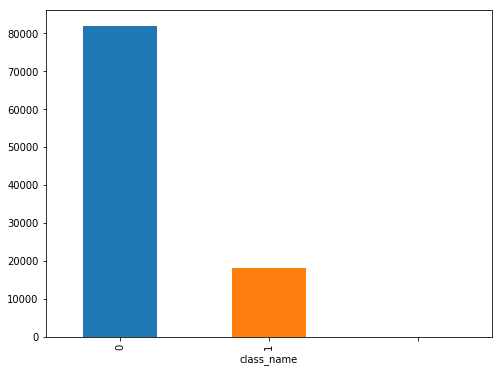

In [20]:
fig = plt.figure(figsize=(8,6))
data.groupby('class_name').clean_art.count().plot.bar(ylim=0)
plt.show()

In [21]:
## Create Sets
X = data['clean_art']
Y = data['class_name']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

In [22]:
Y_train = list(Y_train.values)
Y_test = list(Y_test.values)

In [103]:
#tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', ngram_range=(1, 2))
#X_train = tfidf.fit_transform(X_train).toarray()
#print(X_train.shape)

**Testing Different Classifiers: **
   

In [ ]:
# ----- MultinominalNB

In [10]:
tfidf_vec = TfidfVectorizer(min_df=1)
X_train_tfidf = tfidf_vec.fit_transform(X_train)

# Train Classifier
clf = MultinomialNB().fit(X_train_tfidf, Y_train)

X_test_tfd = tfidf_vec.transform(X_test)
mnb_preds = clf.predict(X_test_tfd)

In [11]:
# ----- LinearSVC

In [23]:
clf_lsvc = LinearSVC()
tfidf_vec = TfidfVectorizer(min_df=1)
X_train_tfidf = tfidf_vec.fit_transform(X_train)
clf_lsvc = clf_lsvc.fit(X_train_tfidf, Y_train)
X_test_tfd = tfidf_vec.transform(X_test)
lsvc_preds = clf_lsvc.predict(X_test_tfd)

In [24]:
data['predicted_class_name'] = ""

for c,i in enumerate(data.clean_art):
    test_tfd = tfidf_vec.transform([i])
    data['predicted_class_name'][c] = clf_lsvc.predict(test_tfd)[0]

In [25]:
acc_count = 0

for i in range(0,len(data)):
    if data.class_name[i] != int(data.predicted_class_name[i]):
        acc_count += 1

In [26]:
(100000 - acc_count) / len(data) * 100 

99.527

In [16]:
data_onlyads = data[data.class_name == 1]
data_onlyads = data_onlyads.reset_index(drop=True)
acc_count = 0

for i in range(0,len(data_onlyads)):
    if data_onlyads.class_name[i] != int(data_onlyads.predicted_class_name[i]):
        acc_count += 1

In [17]:
(len(data_onlyads) - acc_count) / len(data_onlyads) * 100 

95.48002385211689

*** Test Data Import and Classification ***

In [28]:
for np in ['roni', 'nvdd', 'algh']:
    os.chdir("C://Users//Ruben//Downloads//metadata//" + np + '_set')
    df = pd.read_csv('1880-1890.csv', sep = '\t')
    df['cleaned'] = [clean_and_split_str(art) for art in df.ocr]
    test_tfd = tfidf_vec.transform(df['cleaned'])
    df['predict'] = list(clf_lsvc.predict(test_tfd))
    df = df[df.predict == '1']
    df.to_csv('extracted_job_ads_' + np +  '_2.csv')

In [29]:
os.chdir("C://Users//Ruben//Documents//DHLab")


from sklearn.externals import joblib
joblib.dump(tfidf_vec, 'tfidfVectorizer_a.pkl')
joblib.dump(clf_lsvc, 'classifier_a.pkl')

['classifier_a.pkl']